In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [41]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/stroke_prediction_dataset.csv')

In [42]:
df.shape

(15000, 22)

In [43]:
df.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [44]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


# **Handling Missing Values**

In [45]:
df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [47]:
# Handle missing values by filling with mode
most_frequent_symptom = df['Symptoms'].mode()[0]
most_frequent_symptom

'Difficulty Speaking'

In [48]:
df['Symptoms'].fillna(most_frequent_symptom, inplace=True)

In [49]:
df.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

In [50]:
df = df.drop(['Patient ID', 'Patient Name'], axis=1)

In [51]:
df.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [52]:
df.shape

(15000, 20)

In [53]:
df.describe()

,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


**Handling Outliers**

In [54]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels'],
      dtype='object')


In [55]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    upper = np.where(df[column] > upper_bound)
    lower = np.where(df[column] < lower_bound)
    print(f'Outliers in {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Upper outliers: {upper}')
    print(f'Lower outliers: {lower}')
cols = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)','Stress Levels']

# Detect outliers for each numerical column
for col in cols:
    detect_outliers(df, col)

Outliers in Age:
Lower bound: -18.0, Upper bound: 126.0
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Average Glucose Level:
Lower bound: -10.595000000000013, Upper bound: 269.70500000000004
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Body Mass Index (BMI):
Lower bound: 2.320000000000004, Upper bound: 52.559999999999995
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Stress Levels:
Lower bound: -4.929999999999999, Upper bound: 14.989999999999998
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)


**Exploratory Data Analysis**

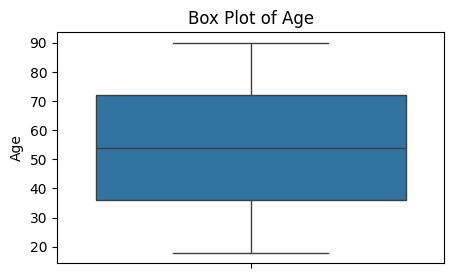

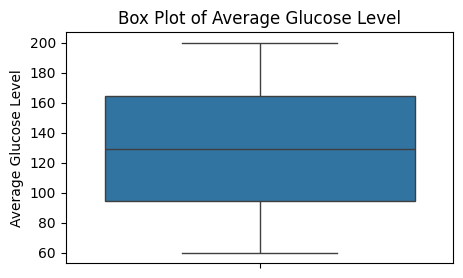

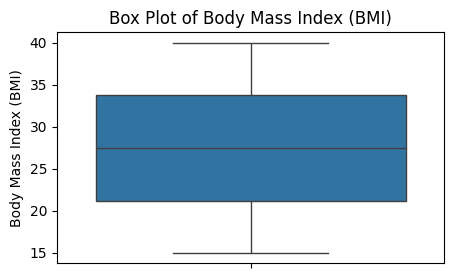

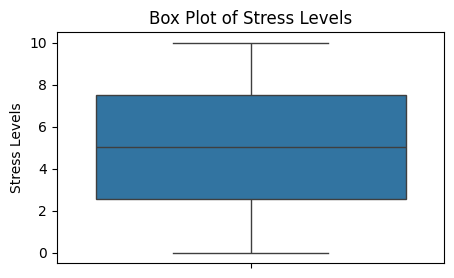

In [64]:
def create_box_plots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(5, 3))
        sns.boxplot(data=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

# Creating box plots for each numerical column
create_box_plots(df, cols)

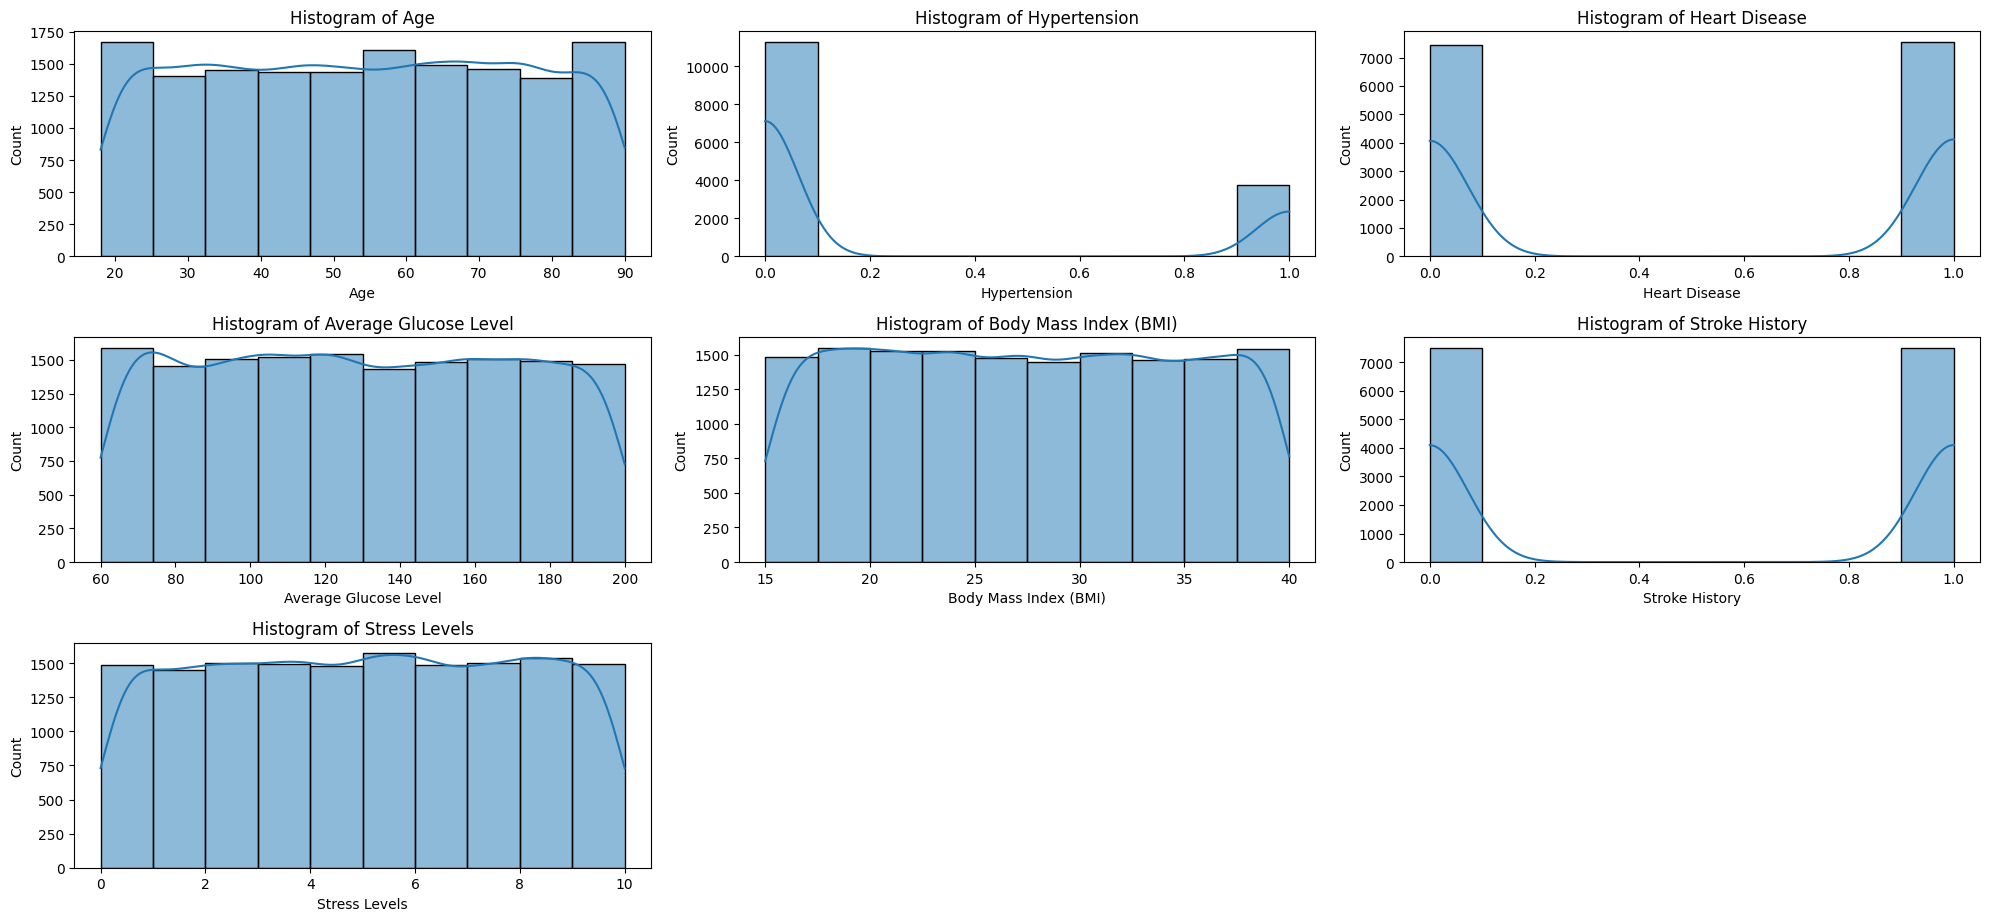

In [65]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [58]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')


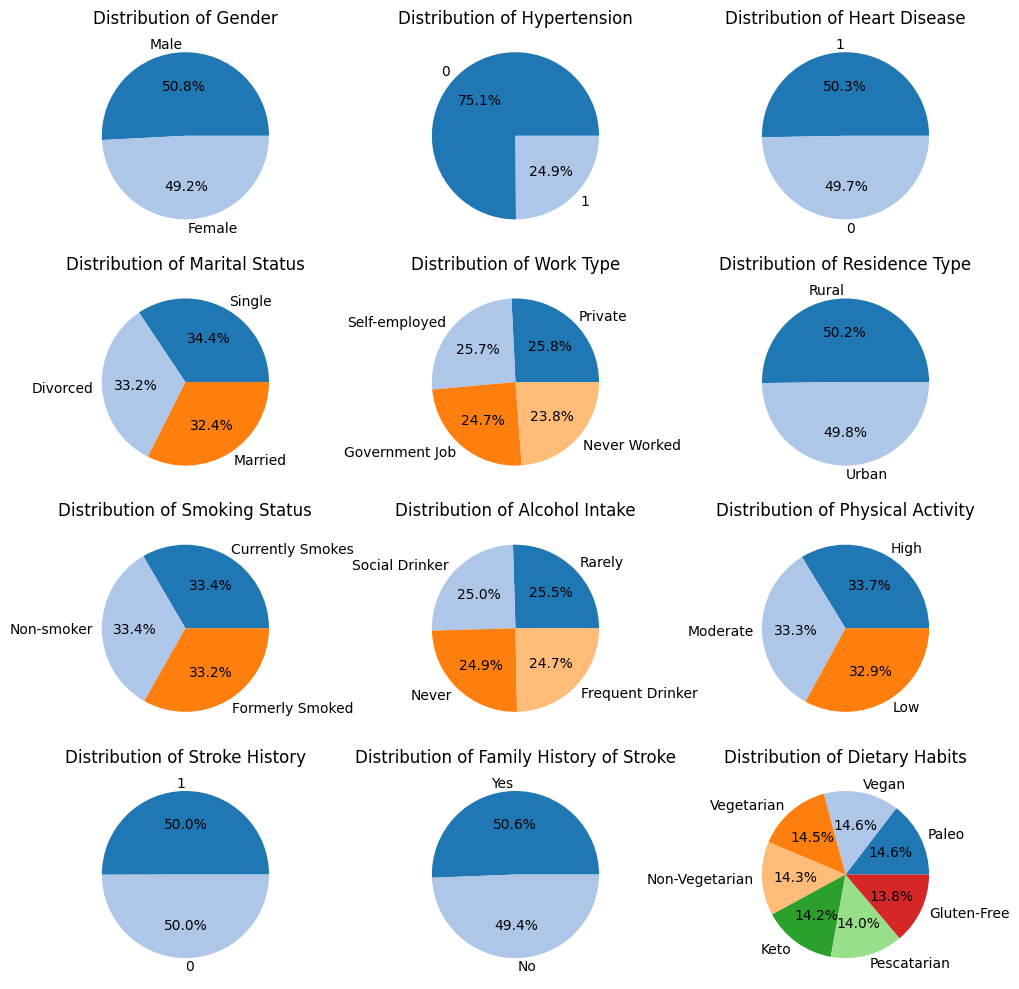

In [76]:
import matplotlib.pyplot as plt
categorical_cols = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
                    'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake',
                    'Physical Activity', 'Stroke History', 'Family History of Stroke',
                    'Dietary Habits']
n_rows = 4
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10,10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], colors=plt.cm.tab20.colors)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()


<ipython-input-79-a358ba2928ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', ax=axes[i])
<ipython-input-79-a358ba2928ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', ax=axes[i])
<ipython-input-79-a358ba2928ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1', ax=axes[i])
<ipython-input-79-a358ba2928ec>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

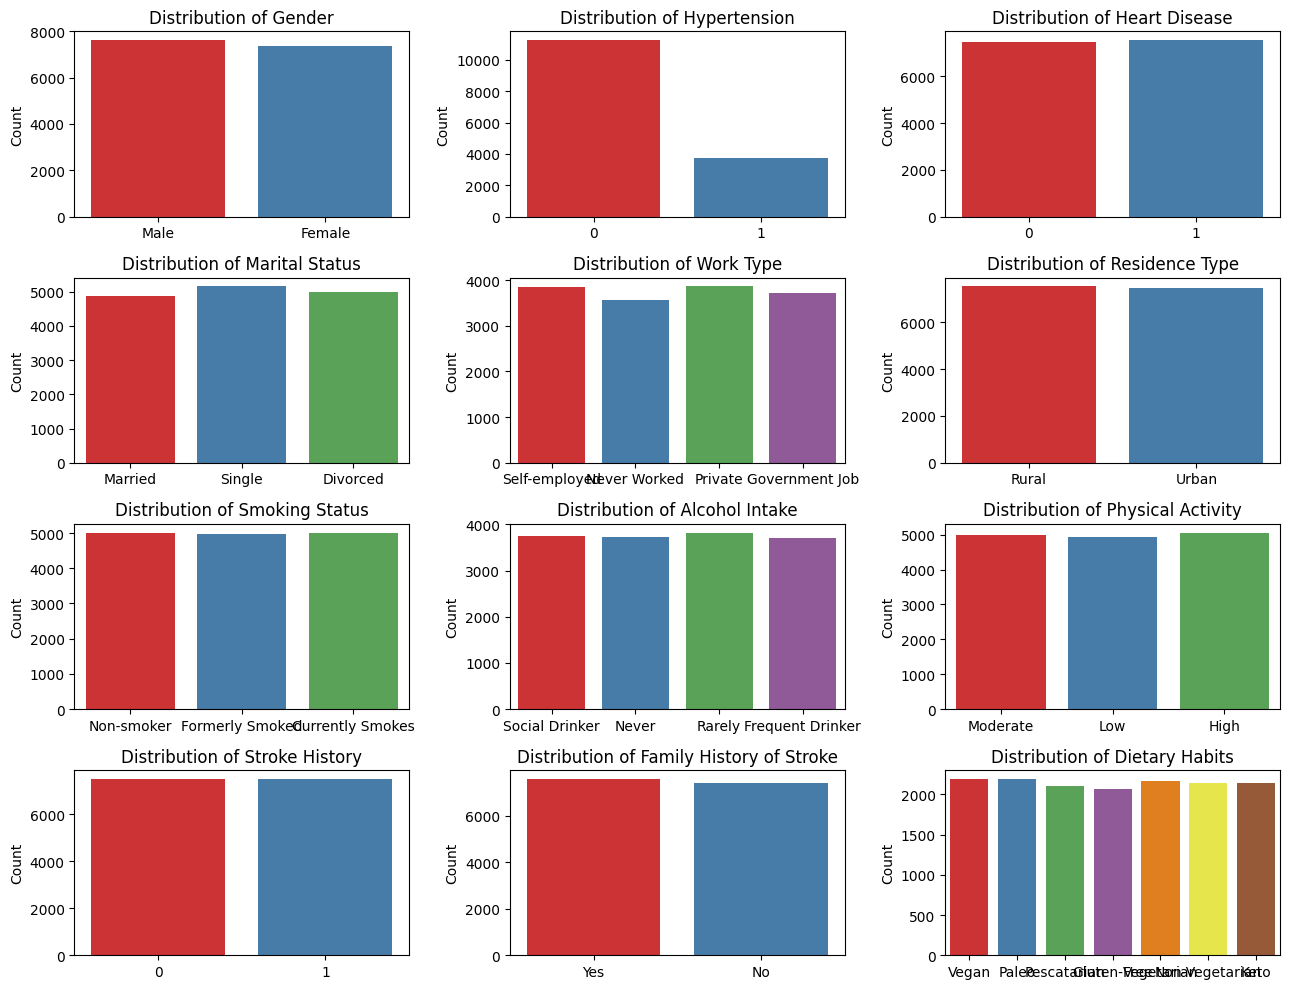

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
                    'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake',
                    'Physical Activity', 'Stroke History', 'Family History of Stroke',
                    'Dietary Habits']
n_rows = 4
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 10))
axes = axes.flatten()
# Plot each bar chart
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()


######Label encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')


In [81]:
label_encoders = {}
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

# Print the mapping for each column
for col in label_encoders:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'{col}: {mapping}')


Gender: {'Female': 0, 'Male': 1}
Marital Status: {'Divorced': 0, 'Married': 1, 'Single': 2}
Work Type: {'Government Job': 0, 'Never Worked': 1, 'Private': 2, 'Self-employed': 3}
Residence Type: {'Rural': 0, 'Urban': 1}
Smoking Status: {'Currently Smokes': 0, 'Formerly Smoked': 1, 'Non-smoker': 2}
Alcohol Intake: {'Frequent Drinker': 0, 'Never': 1, 'Rarely': 2, 'Social Drinker': 3}
Physical Activity: {'High': 0, 'Low': 1, 'Moderate': 2}
Family History of Stroke: {'No': 0, 'Yes': 1}
Dietary Habits: {'Gluten-Free': 0, 'Keto': 1, 'Non-Vegetarian': 2, 'Paleo': 3, 'Pescatarian': 4, 'Vegan': 5, 'Vegetarian': 6}
Blood Pressure Levels: {'100/100': 0, '100/101': 1, '100/102': 2, '100/103': 3, '100/104': 4, '100/105': 5, '100/106': 6, '100/107': 7, '100/108': 8, '100/109': 9, '100/110': 10, '100/60': 11, '100/61': 12, '100/62': 13, '100/63': 14, '100/64': 15, '100/65': 16, '100/67': 17, '100/68': 18, '100/69': 19, '100/70': 20, '100/71': 21, '100/72': 22, '100/73': 23, '100/74': 24, '100/75': 25,

In [82]:
df.head(10)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1971,4469,1375,1
1,80,1,0,0,2,3,1,183.73,32.57,2,1,1,0,0,3,1.73,2295,3934,3146,1
2,26,1,1,1,1,1,0,189.00,20.32,1,2,0,0,1,3,7.31,2696,3502,4201,1
3,73,1,0,0,1,1,1,185.29,27.50,2,0,2,0,0,3,5.35,3657,4698,4059,0
4,51,1,1,1,0,3,1,177.34,29.06,0,2,1,0,1,4,6.84,1068,4169,1150,1
5,62,0,0,0,2,2,1,91.60,37.47,0,3,0,0,0,0,4.85,1581,5922,4637,1
6,40,0,1,0,1,2,1,77.83,28.20,0,1,1,1,0,6,6.38,3829,151,1150,0
7,61,0,0,1,0,0,0,194.73,26.44,1,2,2,1,0,5,5.85,3896,4231,2911,1
8,72,0,1,1,1,3,0,72.99,30.10,1,2,0,1,0,6,0.73,2017,4818,3075,1
9,82,1,0,0,0,3,1,111.23,28.83,0,2,0,1,1,2,8.39,965,339,1150,0


<Axes: xlabel='Age', ylabel='Blood Pressure Levels'>

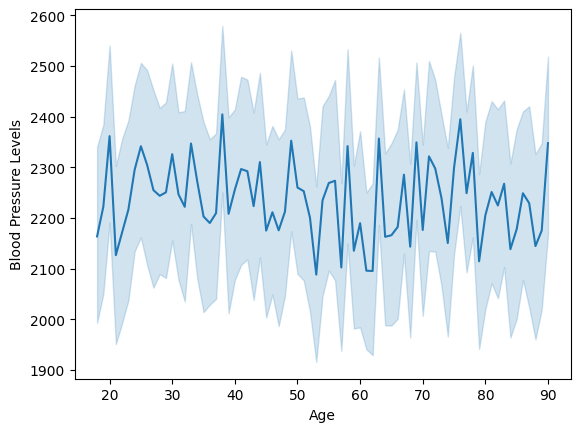

In [84]:
# Blood Pressure Levels by Age
sns.lineplot(x = "Age", y = "Blood Pressure Levels", data=df)

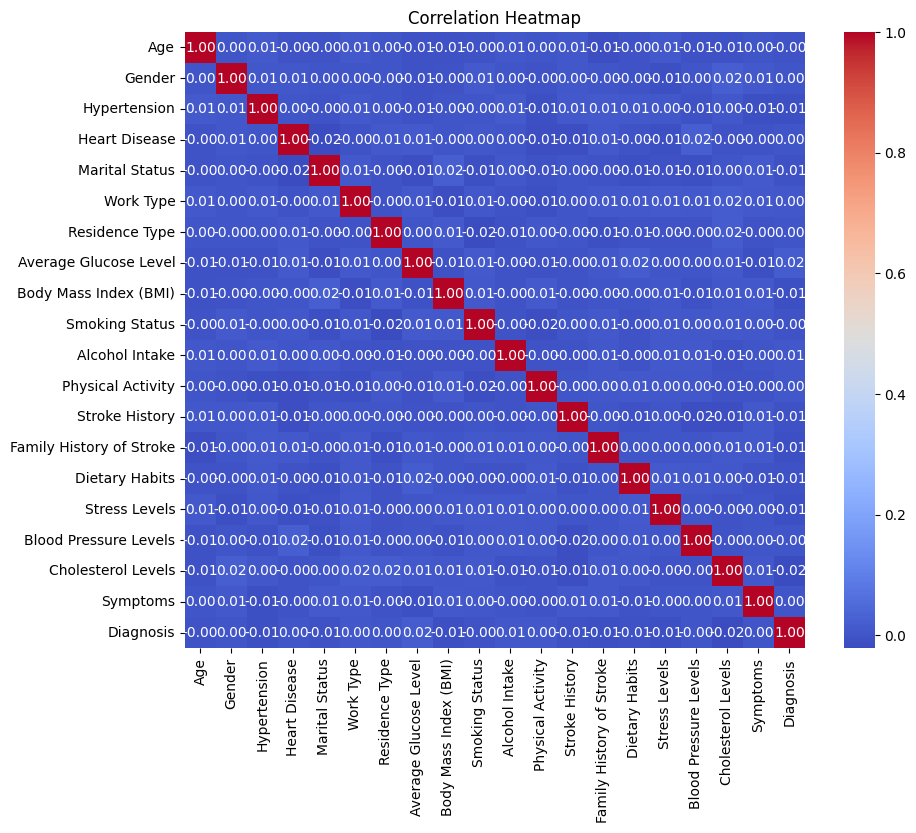

In [83]:
# Heatmap for correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
